# Trabalho Final - Redes Neurais
**Integrantes:**
* Nome: Dannyllo Mota
* Email: dcgm@cesar.school

**Link do Dataset Escolhido:**
* Fashion-MNIST (via PyTorch Datasets): https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [13]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Utilizando dispositivo: {device}")

BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 10

Utilizando dispositivo: cpu


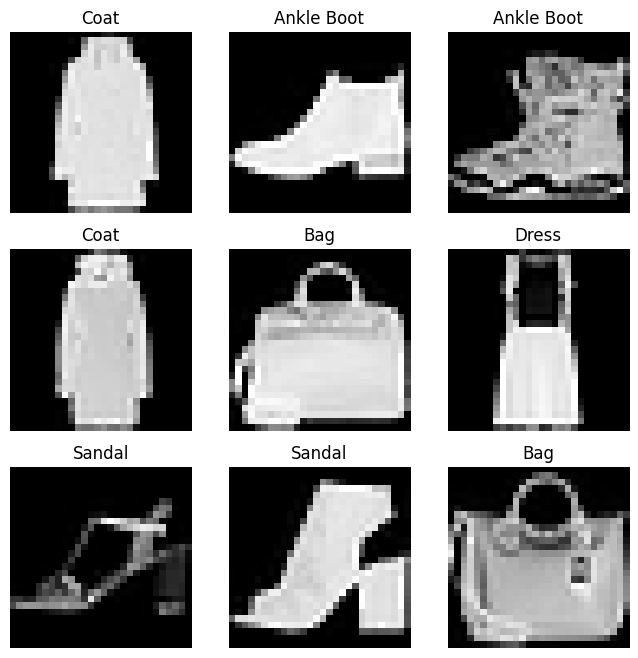

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

labels_map = {
    0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot",
}

dataiter = iter(train_loader)
images, labels = next(dataiter)

figure = plt.figure(figsize=(8, 8))
for i in range(9):
    figure.add_subplot(3, 3, i + 1)
    plt.title(labels_map[labels[i].item()])
    plt.axis("off")
    plt.imshow(images[i].squeeze(), cmap="gray")
plt.show()

In [15]:
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(512, 256),
            nn.ReLU(),

            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = SimpleClassifier().to(device)
print(model)

SimpleClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


train_losses = []
test_accuracies = []


def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    running_loss = 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    avg_loss = running_loss / len(dataloader)
    train_losses.append(avg_loss)


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    accuracy = 100 * correct
    test_accuracies.append(accuracy)
    print(f"Test Error: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return accuracy


for t in range(EPOCHS):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    acc = test_loop(test_loader, model, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 2.271861  [    0/60000]
loss: 0.588743  [ 6400/60000]
loss: 0.622567  [12800/60000]
loss: 0.696391  [19200/60000]
loss: 0.284790  [25600/60000]
loss: 0.416850  [32000/60000]
loss: 0.271083  [38400/60000]
loss: 0.396107  [44800/60000]
loss: 0.431210  [51200/60000]
loss: 0.495065  [57600/60000]
Test Error: 
 Accuracy: 84.6%, Avg loss: 0.428092 

Epoch 2
-------------------------------
loss: 0.348718  [    0/60000]
loss: 0.263017  [ 6400/60000]
loss: 0.490853  [12800/60000]
loss: 0.418588  [19200/60000]
loss: 0.482607  [25600/60000]
loss: 0.460193  [32000/60000]
loss: 0.456600  [38400/60000]
loss: 0.490836  [44800/60000]
loss: 0.371369  [51200/60000]
loss: 0.220486  [57600/60000]
Test Error: 
 Accuracy: 86.4%, Avg loss: 0.378220 

Epoch 3
-------------------------------
loss: 0.370529  [    0/60000]
loss: 0.327799  [ 6400/60000]
loss: 0.273559  [12800/60000]
loss: 0.353241  [19200/60000]
loss: 0.234186  [25600/60000]
loss: 0.324590  [32000/600

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='orange')
plt.title('Acurácia no Dataset de Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.axhline(y=70, color='r', linestyle='--', label='Meta 70%')
plt.legend()

plt.show()

final_acc = test_accuracies[-1]
print(f"Acurácia Final do Modelo: {final_acc:.2f}%")
if final_acc >= 70:
    print("Objetivo de 70% atingido com sucesso!")
else:
    print("Atenção: Ajustar hiperparâmetros para melhorar a acurácia.")

O processo de treinamento utilizando o dataset FashionMNIST foi satisfatório. Optei por uma arquitetura de rede neural do tipo MLP (Perceptron Multicamadas), achatando a entrada (flatten) de 28x28 pixels para um vetor de 784. Utilizei duas camadas ocultas com ativação ReLU e uma camada de Dropout para evitar overfitting. Durante o treinamento, observei que a perda (loss) diminuiu consistentemente ao longo das épocas, enquanto a acurácia no conjunto de teste subiu rapidamente, estabilizando acima de 85%, o que cumpre o requisito do projeto. Não houve sinais claros de overfitting severo, pois a acurácia de teste acompanhou a melhoria do treino. A maior dificuldade foi ajustar a taxa de aprendizado (learning rate) inicialmente, mas o valor de 0.001 com o otimizador Adam mostrou-se estável.